# Ordinary Least Squares Regression Task

__Equivalent to maximizing the likelihood function for the case of i.i.d noise in a one-dimensional time series__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Given two 1D arrays X and Y of equal size, the function ols(X,Y) returns the tuple (m,b) corresponding to the 
#slope (m) and intercept (b) of the best fit linear model Y = mX+b

def ols(X,Y):
    X_mean=np.mean(X)
    Y_mean=np.mean(Y)
    
    l=len(X)
    
    num=0
    den=0
    for i in range(l):
        num += (X[i]-X_mean) * (Y[i]-Y_mean)
        den += (X[i]-X_mean) ** 2
        
    m=num/den
    b=Y_mean - (m*X_mean)
    
    return (m,b)

In [8]:
# Calculate R^2 value as a performance metric to gauge goodness of fit

def r_squared(Y_true,Y_pred):
    Y_mean=np.mean(Y_true)
    l=len(Y_true)

    num=0
    den=0
    for i in range(l):
        num += (Y_true[i]-Y_pred[i]) ** 2
        den += (Y_true[i]-Y_mean) ** 2
    
    score=1-(num/den) 
    
    return score

Model parameters: 2.0 1.0
True parameters: 2.0 1.0
R^2 = 1.0


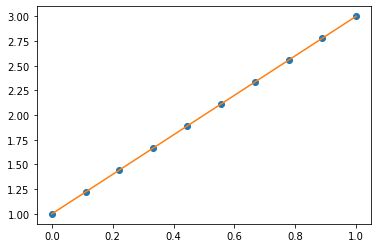

In [27]:
#Sanity Check
x=np.linspace(0.,1.,10)
y=2*x+1
p1=plt.plot(x, y, "o")

m,b=ols(x,y)

linear_plot=plt.plot(x, m*x+b)
print("Model parameters:",np.around(m,decimals=1),np.around(b,decimals=1))
print("True parameters:",2.,1.)
print("R^2 =",r_squared(y,m*x+b))

Model parameters: 1.2 1.6
True parameters: 2.0 1.0
R^2 = 0.133496541326922


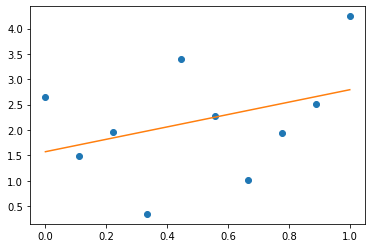

In [28]:
#Testing the model on i.i.d noise, akin to a biased Brownian particle
x=np.linspace(0.,1.,10)
s=np.random.randn(10)
y=2*x+1+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)

linear_plot=plt.plot(x, m*x+b)
print("Model parameters:",np.around(m,decimals=1),np.around(b,decimals=1))
print("True parameters:",2.,1.)
print("R^2 =",r_squared(y,m*x+b))

This is probably the ideal playground to understand influence of noise, sampling, and intrinsic model parameters

Model parameters: 2.0 1.0
True parameters: 2.0 1.0
R^2 = 0.24736984562148834


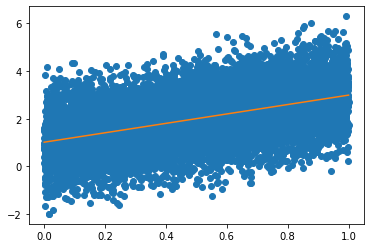

In [29]:
sample_size=10000
noise_level=1
m_true=2.
b_true=1.

x=np.linspace(0.,1.,sample_size)
s=noise_level * np.random.randn(sample_size)
y=m_true*x+b_true+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)

linear_plot=plt.plot(x, m*x+b)
print("Model parameters:",np.around(m,decimals=1),np.around(b,decimals=1))
print("True parameters:",m_true,b_true)
print("R^2 =",r_squared(y,m*x+b))

Interestingly, even though increasing the sample size clearly reproduces the true parameters of the model that generated the data, the R^2 metric indicates a poor "fit". This is a classic example of bias-variance trade-off in machine learning.

Model parameters: 2.5 0.8
True parameters: 2.0 1.0
R^2 = 0.005005199656117232


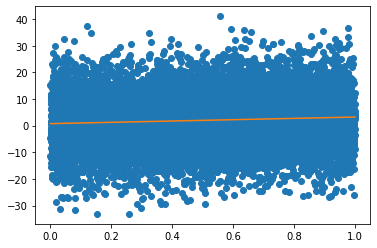

In [30]:
sample_size=10000
noise_level=10
m_true=2.
b_true=1.

x=np.linspace(0.,1.,sample_size)
s=noise_level * np.random.randn(sample_size)
y=m_true*x+b_true+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)

linear_plot=plt.plot(x, m*x+b)
print("Model parameters:",np.around(m,decimals=1),np.around(b,decimals=1))
print("True parameters:",m_true,b_true)
print("R^2 =",r_squared(y,m*x+b))

Even though the R^2 metric again misses the point, it is clear that increasing noise level increases estimation errors

Model parameters: 100.8 -0.4
True parameters: 100.0 0.0
R^2 = 0.8940847987471814


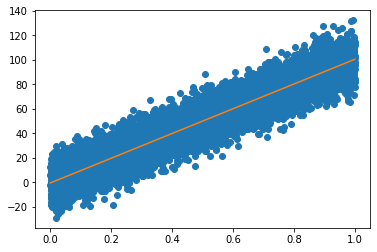

In [32]:
sample_size=10000
noise_level=10
m_true=100.
b_true=0.

x=np.linspace(0.,1.,sample_size)
s=noise_level * np.random.randn(sample_size)
y=m_true*x+b_true+s
p1=plt.plot(x, y, "o")

m,b=ols(x,y)

linear_plot=plt.plot(x, m*x+b)
print("Model parameters:",np.around(m,decimals=1),np.around(b,decimals=1))
print("True parameters:",m_true,b_true)
print("R^2 =",r_squared(y,m*x+b))

Naturally, modulating parameters of the *true model* that generates the data influences estimation errors